<a href="https://colab.research.google.com/github/starodumovski/AIassignment_AI/blob/main/Assingment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `YusufMesbah.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# TODO: Implement task 1
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

data_task_1 = pd.read_csv('Task 1.csv')
data_task_1

data_task_1 = pd.DataFrame(ordinal_encoder.fit_transform(data_task_1), columns=data_task_1.columns)
data_task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   float64
 1   race/ethnicity               1000 non-null   float64
 2   parental level of education  1000 non-null   float64
 3   lunch                        1000 non-null   float64
 4   test preparation course      1000 non-null   float64
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [ ]:
# Rename columns for simplicity
new_names = ['gender', 'race', 'PLoE', 'lunch', 'tpc', 'm_score', 'r_score', 'w_score']

data_task_1.rename(columns={x: new_name for x, new_name in zip(data_task_1.columns, new_names)}, inplace=True)
data_task_1

gender  race  PLoE  lunch  tpc  m_score  r_score  w_score
0       1.0   0.0   2.0    1.0  0.0     43.0     39.0     38.0
1       0.0   3.0   5.0    0.0  1.0     16.0     31.0     30.0
2       1.0   4.0   4.0    0.0  1.0     35.0     32.0     25.0
3       1.0   1.0   2.0    1.0  1.0     53.0     50.0     43.0
4       1.0   4.0   0.0    1.0  0.0     54.0     45.0     43.0
..      ...   ...   ...    ...  ...      ...      ...      ...
995     1.0   2.0   2.0    1.0  1.0     49.0     42.0     40.0
996     1.0   3.0   0.0    0.0  0.0     61.0     63.0     67.0
997     0.0   2.0   5.0    0.0  1.0      8.0      7.0     16.0
998     0.0   2.0   4.0    1.0  1.0     49.0     46.0     57.0
999     1.0   0.0   4.0    1.0  0.0     41.0     32.0     37.0

[1000 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

data_task_1_encoded = data_task_1.copy()

scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [17]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from typing import List, Union
import itertools
import numpy as np

In [ ]:

def wrap_into_frame(data, columns, return_frame: bool):
  if return_frame is True:
    return pd.DataFrame(data, columns=columns)
  return data


def scale_it(data,
             scaler,
             to_fit: bool = False,
             inverse: bool = False,
             columns: Union[None, List[str]] = None,
             return_frame: bool = True):
  if inverse is True:
    if columns is None:
      return wrap_into_frame(scaler.inverse_transform(data), data.columns, return_frame)
    return wrap_into_frame(scaler.inverse_transform(data), columns, return_frame)
  if to_fit is True:
    return wrap_into_frame(scaler.fit_transform(data), data.columns, return_frame)
  return wrap_into_frame(scaler.transform(data), data.columns, return_frame)



# create ANN model
def create_ann():
  model = Sequential()
  
  model.add(Dense(units=128, input_dim=5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.02,
                                                  momentum=0.1,
                                                  nesterov=True),
                metrics=["accuracy"])

  return model


X_train, X_test, y_train, y_test = train_test_split(data_task_1[['gender',
                                                                 'race',
                                                                 'PLoE',
                                                                 'lunch',
                                                                 'tpc']],
                                                    data_task_1[['m_score',
                                                                 'r_score',
                                                                 'w_score']],
                                                    test_size=0.2,
                                                    random_state=42)
ann_model = create_ann()

X_train = scale_it(X_train, scaler_x, to_fit=True)
X_test = scale_it(X_test, scaler_x)
y_train = scale_it(y_train, scaler_y, to_fit=True)
y_test = scale_it(y_test, scaler_y)

report = ann_model.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose=1, validation_split=0.1)


Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: 1.0024 - accuracy: 0.4139 - val_loss: 0.9839 - val_accuracy: 0.5625
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.0014 - accuracy: 0.5028 - val_loss: 0.9831 - val_accuracy: 0.4375
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 1.0003 - accuracy: 0.4514 - val_loss: 0.9824 - val_accuracy: 0.4875
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.5153 - val_loss: 0.9814 - val_accuracy: 0.4000
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9984 - accuracy: 0.4528 - val_loss: 0.9798 - val_accuracy: 0.4750
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9969 - accuracy: 0.5097 - val_loss: 0.9779 - val_accuracy: 0.4750
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9956 - accuracy: 0.5278 - val_loss: 0.9756 - val_accuracy: 0.4625
Epoch 8/50
36/36 [==

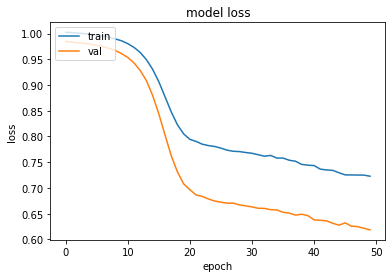

In [ ]:
import matplotlib.pyplot as plt

plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

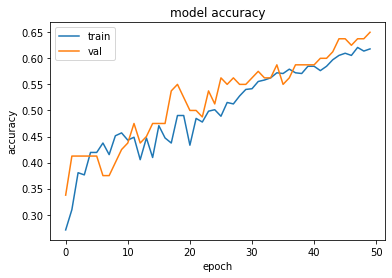

In [ ]:
plt.plot(report.history['accuracy'])
plt.plot(report.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = ann_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7683663964271545
Test accuracy: 0.6800000071525574


#### **But it seem that it has bad accuracy**

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
num_layers = 3
min_nodes_per_layer, max_nodes_per_layer = 64, 256
node_step_size = 32

node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 96, 128, 160, 192, 224, 256]

In [ ]:
two_layer_possibilities = [node_options, node_options]
two_layer_possibilities

[[64, 96, 128, 160, 192, 224, 256], [64, 96, 128, 160, 192, 224, 256]]

In [ ]:
layer_possibilities = [node_options] * num_layers
layer_possibilities

[[64, 96, 128, 160, 192, 224, 256],
 [64, 96, 128, 160, 192, 224, 256],
 [64, 96, 128, 160, 192, 224, 256]]

In [ ]:
layer_node_permutations = list(itertools.product(*layer_possibilities))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    results = []

    def calculate_accuracy(y_test, prediction_classes):
      print("accuracy_calc")
      m_scores_test = [x[0] for x in y_test]
      w_scores_test = [x[1] for x in y_test]
      r_scores_test = [x[2] for x in y_test]
      m_scores_pred = [x[0] for x in prediction_classes]
      w_scores_pred = [x[1] for x in prediction_classes]
      r_scores_pred = [x[2] for x in prediction_classes]
      m_error = np.mean([np.abs(x - y) % 100 for x, y in zip(m_scores_test, m_scores_pred)])
      w_error = np.mean([np.abs(x - y) % 100 for x, y in zip(w_scores_test, w_scores_pred)])
      r_error = np.mean([np.abs(x - y) % 100 for x, y in zip(r_scores_test, r_scores_pred)])

      return (m_error, w_error, r_error,)

    
    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics='accuracy'
        )
        
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )

        prediction_classes = model.predict(X_test)
        print('prediction_classes')
        return {
            'model_name': model.name,
            'test_accuracy': model.evaluate(X_test, y_test)[-1],
            'absolute mean error': calculate_accuracy(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            print("train")
            print(res)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_task_1[['gender',
                                                                 'race',
                                                                 'PLoE',
                                                                 'lunch',
                                                                 'tpc']],
                                                    data_task_1[['m_score',
                                                                 'r_score',
                                                                 'w_score']],
                                                    test_size=0.2,
                                                    random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=X_train_scaled.shape[1],
    num_nodes_at_output=3
)

optimization_results = optimize(
    models=all_models,
    X_train=X_train_scaled,
    # y_train=np.array([list(map(int, x)) for x in y_train.values]),
    y_train=y_train_scaled,
    X_test=X_test_scaled,
    # y_test=np.array([list(map(int, x)) for x in y_test.values])
    y_test=y_test_scaled
)

optimization_results.sort_values(by='test_accuracy', ascending=False)

7/7 [==============================] - 0s 2ms/step
prediction_classes
7/7 [==============================] - 0s 3ms/step - loss: -1801031.2500 - accuracy: 0.4500
accuracy_calc
train
{'model_name': 'dense64_dense64_dense64', 'test_accuracy': 0.44999998807907104, 'absolute mean error': (0.7675502920250534, 0.7926544530358083, 0.790333425871574)}
7/7 [==============================] - 0s 2ms/step
prediction_classes
7/7 [==============================] - 0s 3ms/step - loss: -3499150.7500 - accuracy: 0.4600
accuracy_calc
train
{'model_name': 'dense64_dense64_dense128', 'test_accuracy': 0.46000000834465027, 'absolute mean error': (0.7903381292247948, 0.8144459006002083, 0.8089237005615334)}
7/7 [==============================] - 0s 3ms/step
prediction_classes
7/7 [==============================] - 0s 3ms/step - loss: -4910873.5000 - accuracy: 0.4050
accuracy_calc
train
{'model_name': 'dense64_dense64_dense192', 'test_accuracy': 0.4050000011920929, 'absolute mean error': (0.769571070566977, 0

model_name  test_accuracy  \
21  dense128_dense128_dense128          0.530   
29  dense128_dense256_dense128          0.515   
13   dense64_dense256_dense128          0.515   
46  dense192_dense256_dense192          0.515   
24   dense128_dense192_dense64          0.510   
..                         ...            ...   
48    dense256_dense64_dense64          0.345   
37  dense192_dense128_dense128          0.345   
28   dense128_dense256_dense64          0.345   
44   dense192_dense256_dense64          0.340   
9    dense64_dense192_dense128          0.340   

                                  absolute mean error  
21  (0.772212157429897, 0.8082642045775565, 0.8013...  
29  (0.774197706301794, 0.7934477096352656, 0.7856...  
13  (0.7834623010630375, 0.7955839377287578, 0.793...  
46  (0.7662353913541793, 0.8027078467333846, 0.776...  
24  (0.7816925914012508, 0.7990266101857764, 0.773...  
..                                                ...  
48  (0.7838135444587264, 0.8275891086495512, 0.823...  
37  (0.7621454579717317, 0.7998442774917719, 0.792...  
28  (0.7810890295529676, 0.7935212084010103, 0.785...  
44  (0.7659360626674592, 0.8206587203242163, 0.793...  
9   (0.7912731292085337, 0.7988388465110289, 0.778...  

[64 rows x 3 columns]

In [ ]:
accs = [acc for acc in optimization_results['test_accuracy']]
sorted(accs, reverse=True)[0]

0.5299999713897705

**Thoughts**: So, with the first model we got more accurate prediction, which can mean that we need more complex design of our model for more accurate predictions

### Questions
1. What preprocessing techniques did you use? Why?
    - I applied **Ordinal encoding**, since it was the easiest ay to encode on column of the data.
    - Also, the **Standart scaling** was used because it gave more accurate prediction than before scaling
2. Describe the fine-tuning process and how you reached your model architecture.
    - For the first model I decided that sometimes it os enough to apply simple model architecture (3 denses) with random but enough amount of nodes in the layer. Also I used SGD optimizer for the momentum defining
    - Then I decided to play with amounts of nodes inside of layers. But it gave no more accurate result. So we can assume that we need more complex model for better predictions

In [ ]:
from keras.utils import to_categorical
num_classes = 1000

check=[f'{i}{i}{i}' for i in range(10)]
check = to_categorical(check, num_classes)
check.sum()

10.0

# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

In [ ]:
# TODO: Implement task 2

#### mount and unzip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/ML/triple_mnist.zip" -d "digits"

Streaming output truncated to the last 5000 lines.
 extracting: digits/triple_mnist/val/686/54_686.png  
 extracting: digits/triple_mnist/val/686/55_686.png  
 extracting: digits/triple_mnist/val/686/56_686.png  
 extracting: digits/triple_mnist/val/686/57_686.png  
 extracting: digits/triple_mnist/val/686/58_686.png  
 extracting: digits/triple_mnist/val/686/59_686.png  
 extracting: digits/triple_mnist/val/686/5_686.png  
 extracting: digits/triple_mnist/val/686/60_686.png  
 extracting: digits/triple_mnist/val/686/61_686.png  
 extracting: digits/triple_mnist/val/686/62_686.png  
 extracting: digits/triple_mnist/val/686/63_686.png  
 extracting: digits/triple_mnist/val/686/64_686.png  
 extracting: digits/triple_mnist/val/686/65_686.png  
 extracting: digits/triple_mnist/val/686/66_686.png  
 extracting: digits/triple_mnist/val/686/67_686.png  
 extracting: digits/triple_mnist/val/686/68_686.png  
 extracting: digits/triple_mnist/val/686/69_686.png  
 extracting: digits/triple_mnist

#### Data preparation

In [ ]:
import torch
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
from torchvision import datasets
from torchvision import transforms
# forms = transforms.Compose(transforms.ToTensor(), transforms.Grayscale())
train_data_task_2 = datasets.ImageFolder('digits/triple_mnist/train', transform=transforms.ToTensor())
valid_data_task_2 = datasets.ImageFolder('digits/triple_mnist/val', transform=transforms.ToTensor())
test_data_task_2 = datasets.ImageFolder('digits/triple_mnist/test', transform=transforms.ToTensor())
x_check = train_data_task_2.imgs
print(x_check[0])
print(train_data_task_2)
print(valid_data_task_2)
print(test_data_task_2)

In [16]:
import cv2

img = cv2.imread('/content/digits/triple_mnist/train/279/10_279.png', cv2.IMREAD_GRAYSCALE)

def get_images_of_digits(image):
  components = cv2.connectedComponentsWithStats(image, 8, cv2.CV_16U) #Separate digits
  #Get position of every components
  #For details how this works take a look at 
  #https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python
  position_of_digits = components[2] 
  number_of_digits = len(position_of_digits) - 1 #number of digits found in image
  digits = [] #Array with every digit in image
  for i in range(number_of_digits):    
    w = position_of_digits[i+1,0] #Left corner of digit
    h = position_of_digits[i+1,1] #Top corner of digit
    digit = image[h:h+10,w:w+10] #Cut this digit out of image

    #Count how many white pixels there are
    px_count = np.count_nonzero(digit)
    #Divide every pixel by square root of count of pixels in digit. 
    #Why? If we make convolution with the same digit it will give us sweet "1", which means these digits are identical
    digit = digit / np.sqrt(px_count)  
  digits.append(digit)

  return digits #Return all digits  

print(get_images_of_digits(img))

[array([[ 0.        ,  0.        , 14.01592501, 23.93870378, 31.50482259,
        31.38078785, 29.02412789, 31.38078785, 31.50482259, 26.41939847],
       [ 0.        , 15.25627235, 31.38078785, 26.29536373,  6.20173673,
         6.20173673,  3.72104204,  6.20173673, 13.89189027, 28.77605842],
       [ 8.93050089, 31.38078785, 27.78378055,  2.48069469,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  7.69015354],
       [28.90009316, 31.25675312, 15.13223762,  0.        ,  0.        ,
         0.        ,  0.        , 15.25627235, 25.17905112, 27.65974581],
       [31.62885732, 31.38078785, 12.65154293,  0.        ,  0.        ,
         0.        ,  0.        , 25.17905112, 31.50482259, 31.38078785],
       [31.38078785, 31.25675312, 17.61293231,  0.        ,  0.        ,
         0.        ,  0.        , 20.093627  , 31.38078785, 31.25675312],
       [15.25627235, 30.14044051, 31.50482259, 26.41939847,  6.32577146,
         6.32577146,  8.93050089, 28.9000931

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [18]:
import cv2
import os

import torch
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

def load_images_from_folder(folder, images, labels, label=None):
  for filename in os.listdir(folder):
    if filename.count('.') == 0:
      load_images_from_folder(os.path.join(folder,filename), images, labels, filename)
      continue
    img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
      labels.append(label)
      images.append(img)
  return np.asarray(images), np.asarray(labels)

cpu


In [19]:
x_train, x_val, x_test = [], [], []
y_train, y_val, y_test = [], [], []
x_train, y_train = load_images_from_folder('digits/triple_mnist/train', x_train, y_train)
x_val, y_val = load_images_from_folder('digits/triple_mnist/val', x_val, y_val)
x_test, y_test = load_images_from_folder('digits/triple_mnist/test', x_test, y_test)

In [ ]:
print(f"Shapes, {x_train.shape}")

Shapes, (64000, 84, 84)


In [ ]:
x_val.shape
len(x_val)

16000

In [21]:
# save input image dimensions
img_rows, img_cols = 84, 84

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [22]:
# y must be in categorical values for 1000 classes
from keras.utils import to_categorical

num_classes = 1000

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

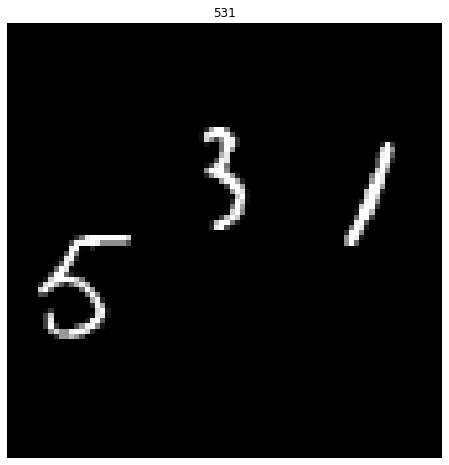

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8))
cols, rows = 1, 1
for i in range(1, cols * rows + 1):
    # sample_idx = torch.randint(len(x_train), size=(1,)).item()
    sample_idx = 100
    img, l = x_train[sample_idx], np.where(y_train[sample_idx] == 1)[0][0]
    # l = train_data_task_2.classes[l]
    figure.add_subplot(rows, cols, i)
    plt.title(l)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data_task_2, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1,
                                          pin_memory=True),
    
    'test'  : torch.utils.data.DataLoader(test_data_task_2, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    'valid' : torch.utils.data.DataLoader(valid_data_task_2, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fd69f4611d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fd69f461a10>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7fd69f461c90>}

#### Save model and plots

In [ ]:
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
def save_model(epochs, model, optimizer, criterion):
    """
    Function to save the trained model to disk.
    """
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, 'outputs/model.pth')

In [ ]:
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('outputs/accuracy.png')
    
    # loss plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('outputs/loss.png')

#### training and validation

In [ ]:
import torch.nn as nn

# training
def train(model, trainloader, optimizer, criterion: nn.CrossEntropyLoss):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data

        image = image.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # forward feed
        outputs = model(image)[0]

        # loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()

        # accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()

        optimizer.step()
    
    # epoch measure
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

# validation
def validate(model, testloader, criterion, validate:bool = True):
    model.eval()
    if validate is True:
      print('Validation')
    else:
      print("Testing")
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward feed
            outputs = model(image)[0]
            # loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # epoch measure
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

#### updating ANN model:

In [ ]:
def create_ann_update():
  model = Sequential()
  
  model.add(Dense(units=128, input_dim=5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1000, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.02,
                                                  momentum=0.1,
                                                  nesterov=True),
                metrics=["accuracy"])

  return model


import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(84*84, 256)
        self.hidden2 = nn.Linear(256, 100) 
        self.output = nn.Linear(100, 100) 


    def forward(self, x):
        x = x.view(-1, 84*84)
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        # return F.log_softmax(x, dim=1)
        return x

# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# model = Net().to(device)



In [ ]:
# learning_parameters 
lr = 1e-3
epochs = 4
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
# model = CNNModel().to(device)
model_ann = Net().to(device)
print(model_ann)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model_ann.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model_ann.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
# optimizer
optimizer = optim.Adam(model_ann.parameters(), lr=lr)
# loss function
# losssss = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

Computation device: cpu

Net(
  (hidden1): Linear(in_features=7056, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=100, bias=True)
)
1,842,392 total parameters.
1,842,392 training parameters.


In [ ]:
import time

# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    # train_epoch_loss, train_epoch_acc = train(model, train_loader, 
    #                                           optimizer, criterion)
    # valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
    #                                              criterion)
    train_epoch_loss, train_epoch_acc = train(model_ann, loaders['train'], 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model_ann, loaders['valid'],  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)
    
# save the trained model weights
save_model(epochs, model_ann, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

[INFO]: Epoch 1 of 4
Training


  0%|          | 0/640 [00:00<?, ?it/s]


RuntimeError: ignored

### Try 1

In [ ]:
import torch.nn as nn

# [16, 1, 5, 5], expected input[100, 3, 84, 84]

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=100,
                kernel_size=84,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # [32, 16, 5, 5], expected input[100, 100, 2, 2] to have 16
            nn.Conv2d(100, 100, 2, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(400, 640)

    def forward(self, x):
        x = self.conv1(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
cnn = CNN().to(device)
print(cnn)

cuda
CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(84, 84), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=400, out_features=640, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [ ]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### with another approach


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.metrics import CategoricalAccuracy
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1),
     padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

inputs = keras.Input(shape=(img_rows, img_cols, 1), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(1000, name="predictions", activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
import keras

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.CategoricalAccuracy()
val_acc_metric = keras.metrics.CategoricalAccuracy()

In [26]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=[CategoricalAccuracy()])

In [ ]:
import gc
gc.collect()

1160

In [28]:
batch_size = 24
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))


score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10
  22/2667 [..............................] - ETA: 30:01 - loss: 9.2885 - categorical_accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [24]:
batch_size = 24
epochs = 10
import tensorflow as tf

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value
@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_acc_metric.update_state(y, val_logits)

In [35]:

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(zip(x_train, y_train)):
        loss_value = train_step(x_batch_train, y_batch_train)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in zip(x_val, y_val):
        test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))


Start of epoch 0


ValueError: ignored

In [ ]:
cnn = CNN_app().to(device)
print(cnn)

TypeError: ignored

### train/val/test

### Try 2

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from PIL import Image
from keras.losses import CategoricalCrossentropy
# batch size
BATCH_SIZE = 64

In [ ]:
# the training transforms
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5],
        std=[0.5]
    )
])
# the validation transforms
valid_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5],
        std=[0.5]
    )
])

In [ ]:
train_dataset = datasets.DatasetFolder(
    root='digits/triple_mnist/train',
    loader=lambda x: Image.open(x),
     extensions="png",
    transform=train_transform
)

# validation dataset
valid_dataset = datasets.ImageFolder(
    root='digits/triple_mnist/val',
    transform=valid_transform
)
# training data loaders
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=2, pin_memory=True
)
# validation data loaders
valid_loader = DataLoader(
    valid_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=2, pin_memory=True
)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 5)
        
        self.fc1 = nn.Linear(256, 640)
        
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        bs, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        x = self.fc1(x)
        return x

In [ ]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import time
from tqdm.auto import tqdm

#### first model

In [ ]:
# learning_parameters 
lr = 1e-3
epochs = 4
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
model = CNN().to(device)
print(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

Computation device: cuda

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(84, 84), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=400, out_features=640, bias=True)
)
2,413,640 total parameters.
2,413,640 training parameters.


In [ ]:
import time

# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, x_train, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, x_val,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)
    
# save the trained model weights
save_model(epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

[INFO]: Epoch 1 of 4
Training


  0%|          | 0/64000 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
valid_epoch_loss, valid_epoch_acc = validate(model, loaders['test'], criterion)
valid_loss.append(valid_epoch_loss)
valid_acc.append(valid_epoch_acc)
print(f"Testing loss: {valid_epoch_loss:.3f}, Testing acc: {valid_epoch_acc:.3f}")

Validation


100%|██████████| 200/200 [01:47<00:00,  1.86it/s]

Validation loss: 6.461, validation acc: 0.065


#### second model

In [ ]:
import time

# learning_parameters 
lr = 1e-3
epochs = 4
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
model = CNNModel().to(device)
# model = CNN().to(device)
print(model)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# loss function
# losssss = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()


# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                              optimizer, criterion)
    break
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                 criterion)
    # train_epoch_loss, train_epoch_acc = train(model, loaders['train'], 
    #                                           optimizer, criterion)
    # valid_epoch_loss, valid_epoch_acc = validate(model, loaders['valid'],  
    #                                              criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)
    
# save the trained model weights
save_model(epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

Computation device: cpu

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=640, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
1,109,888 total parameters.
1,109,888 training parameters.
[INFO]: Epoch 1 of 4
Training


  1%|          | 10/1000 [01:44<2:52:27, 10.45s/it]
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.p

KeyboardInterrupt: ignored

### another approach

In [ ]:
loaders['train'].dataset

Dataset ImageFolder
    Number of datapoints: 64000
    Root location: digits/triple_mnist/train
    StandardTransform
Transform: ToTensor()

In [ ]:
from keras import layers
from keras import models

def create_ann_update():
  model = Sequential()
  
  model.add(Dense(units=3, input_dim=450000, kernel_initializer='normal', activation='relu', input_shape=(1,)))
  model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(640, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.02,
                                                  momentum=0.1,
                                                  nesterov=True),
                metrics=["accuracy"])

  return model

# model = create_ann_update()
#define your model
#..........
#......


#Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator
train_dir = "digits/triple_mnist/train"
#PetData/Dog/  : dog images
#PetData/Cat/  : cat images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150, 150), batch_size=20, color_mode= 'grayscale')

# generated_image = train_generator[98][0][0]
# plt.imshow(generated_image.squeeze())

history = updatetd_ann.fit_generator(train_generator.b, steps_per_epoch=100, epochs=5) #fit the model using train_generator

Found 64000 images belonging to 640 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5


InvalidArgumentError: ignored

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
# TODO: Implement task 3

### implemetation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import graphviz 
from IPython.display import Image


DATA_PATH_TASK_3 = 'loan_data.csv'

def plot_my_tree(model, model_name):
  myTree_graph_data = export_graphviz(
                        model,
                        out_file = None,
                        feature_names = data_task_3.columns[1:],
                        class_names = data_task_3.columns[0],
                        filled = True,
                        rounded = True)
  graph = graphviz.Source(myTree_graph_data)  
  thefile = graph.render(model_name, format='png') 
  return thefile


In [ ]:
data_task_3 = pd.read_csv(DATA_PATH_TASK_3)
data_task_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
data_task_3

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [ ]:

ordinal_encoder = OrdinalEncoder()

# ordinal_encoder.fit_transform()
arr = np.array(data_task_3['purpose'])
data_task_3['purpose'] = ordinal_encoder.fit_transform(arr.reshape(arr.shape[0], 1))
data_task_3

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
0                 1      2.0    0.1189       829.10       11.350407  19.48   
1                 1      1.0    0.1071       228.22       11.082143  14.29   
2                 1      2.0    0.1357       366.86       10.373491  11.63   
3                 1      2.0    0.1008       162.34       11.350407   8.10   
4                 1      1.0    0.1426       102.92       11.299732  14.97   
...             ...      ...       ...          ...             ...    ...   
9573              0      0.0    0.1461       344.76       12.180755  10.39   
9574              0      0.0    0.1253       257.70       11.141862   0.21   
9575              0      2.0    0.1071        97.81       10.596635  13.09   
9576              0      4.0    0.1600       351.58       10.819778  19.18   
9577              0      2.0    0.1392       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0      737        5639.958333      28854        52.1               0   
1      707        2760.000000      33623        76.7               0   
2      682        4710.000000       3511        25.6               1   
3      712        2699.958333      33667        73.2               1   
4      667        4066.000000       4740        39.5               0   
...    ...                ...        ...         ...             ...   
9573   672       10474.000000     215372        82.1               2   
9574   722        4380.000000        184         1.1               5   
9575   687        3450.041667      10036        82.9               8   
9576   692        1800.000000          0         3.2               5   
9577   732        4740.000000      37879        57.0               6   

      delinq.2yrs  pub.rec  not.fully.paid  
0               0        0               0  
1               0        0               0  
2               0        0               0  
3               0        0               0  
4               1        0               0  
...           ...      ...             ...  
9573            0        0               1  
9574            0        0               1  
9575            0        0               1  
9576            0        0               1  
9577            0        0               1  

[9578 rows x 14 columns]

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
# data split
X_train, X_test, y_train, y_test = train_test_split(data_task_3.drop(columns=data_task_3.columns[0]), data_task_3['credit.policy'], random_state=42)
X_train


purpose  int.rate  installment  log.annual.inc    dti  fico  \
2058      2.0    0.1568       310.64       10.279318  19.53   692   
9316      4.0    0.1183       256.79       10.736310  13.31   722   
5411      1.0    0.0894       413.03       10.861458  18.99   747   
1166      3.0    0.1355       232.63       11.156251  24.22   687   
8329      2.0    0.1450       137.69       10.566072  22.05   657   
...       ...       ...          ...             ...    ...   ...   
5734      2.0    0.1357       169.85       10.422281  10.71   677   
5191      2.0    0.1426       806.19       11.066638  24.88   702   
5390      2.0    0.1426       720.43       11.018629  18.85   692   
860       2.0    0.1166       247.90       11.002100  19.22   687   
7270      2.0    0.1385       327.40       11.407565   4.95   677   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
2058        3738.000000      21894        99.5               0            0   
9316        4560.000000       7562        57.7               4            0   
5411        3209.958333      14385        50.3               1            0   
1166        3749.958333       8547        55.1               1            1   
8329        3269.000000       8623        71.0               3            0   
...                 ...        ...         ...             ...          ...   
5734        5190.041667        179        44.7               2            1   
5191       10409.958330      30803        84.4               1            0   
5390        5459.958333      18020        34.9               0            0   
860         4530.000000      17745        92.4               1            0   
7270        4290.041667      16733        70.0               1            0   

      pub.rec  not.fully.paid  
2058        0               0  
9316        0               1  
5411        0               0  
1166        0               0  
8329        0               0  
...       ...             ...  
5734        0               0  
5191        0               0  
5390        0               0  
860         0               0  
7270        0               0  

[7183 rows x 13 columns]

In [ ]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

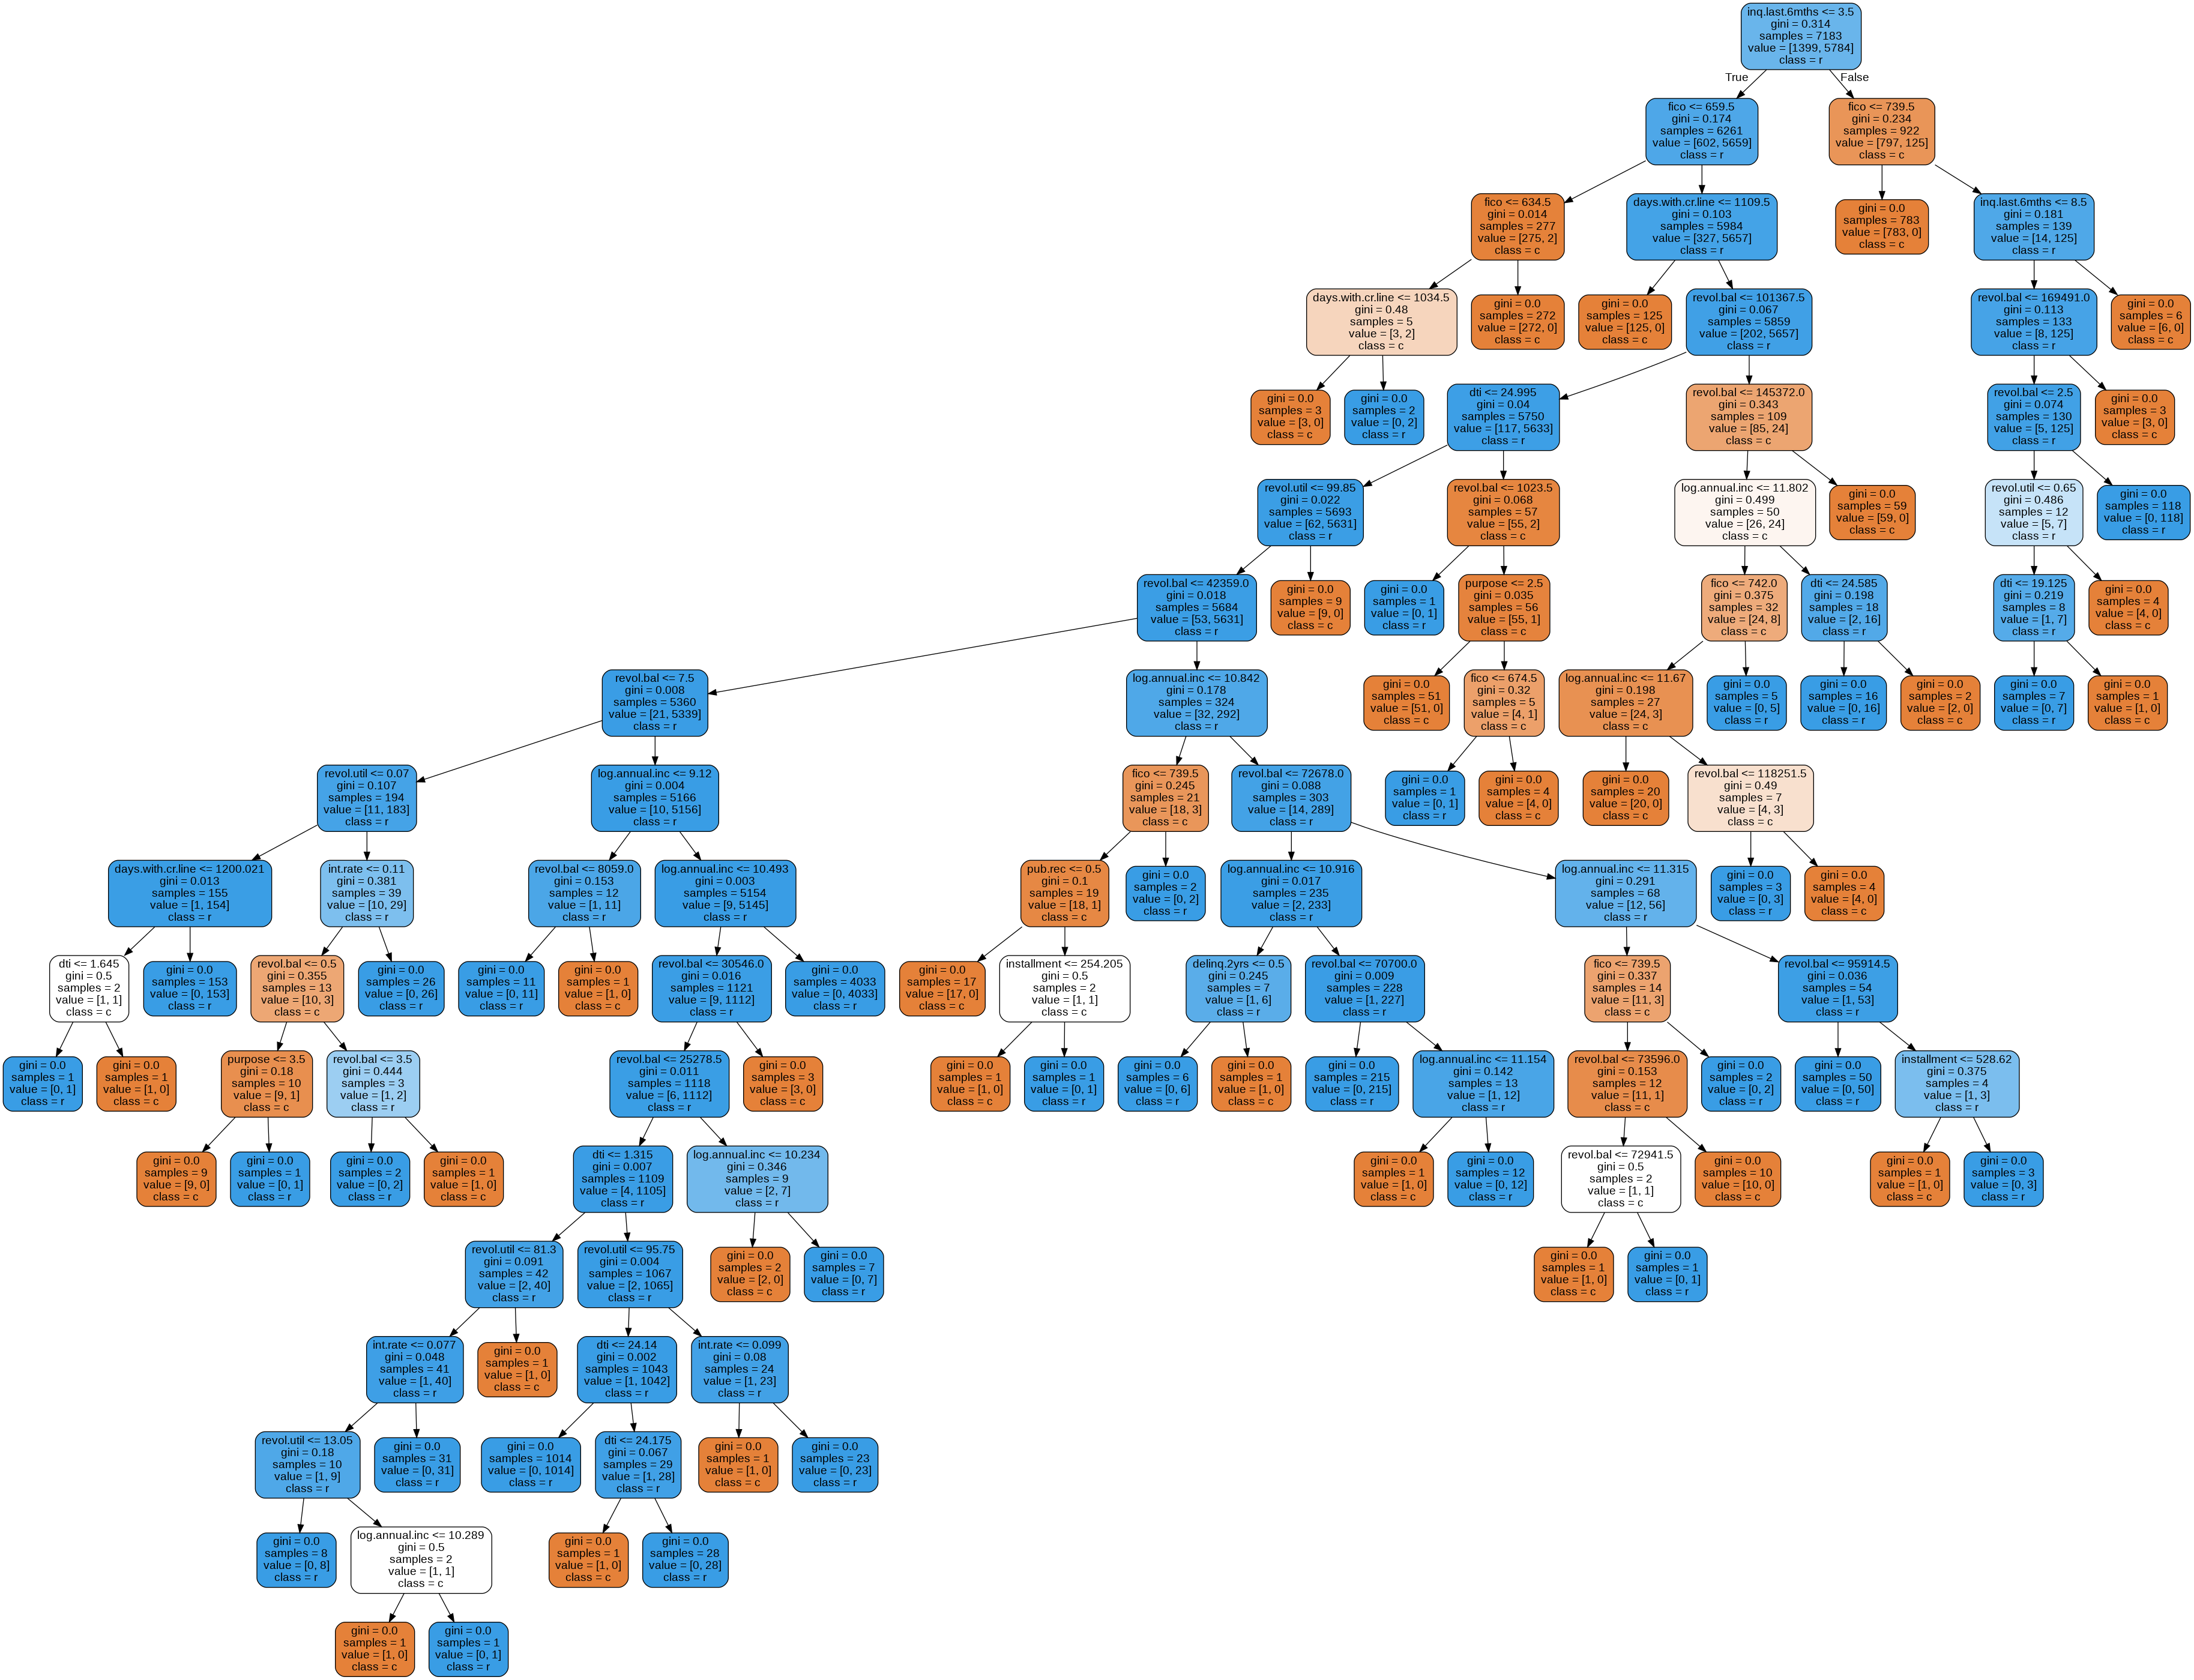

In [ ]:
Image(filename=plot_my_tree(model_tree, "tree_model"))

In [ ]:
score = model_tree.score(X_test, y_test)
print(f"Decision tree score: {score}")

Decision tree score: 0.992901878914405


In [ ]:
model_tree_2 = DecisionTreeClassifier(max_depth=9, ccp_alpha=0.0)
# model_tree_2.fit(X_train, y_train)
path = model_tree_2.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # write 2 lines of code to train the decision tree model on the train dataset and add the model into the clfs array
    clf.fit(X_train, y_train)
    clfs.append(clf)


Text(0, 0.5, 'total depth')

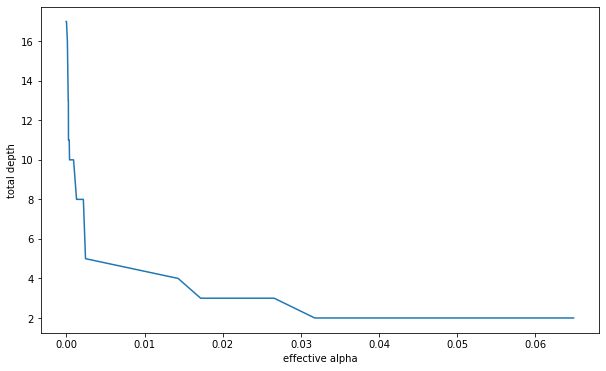

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

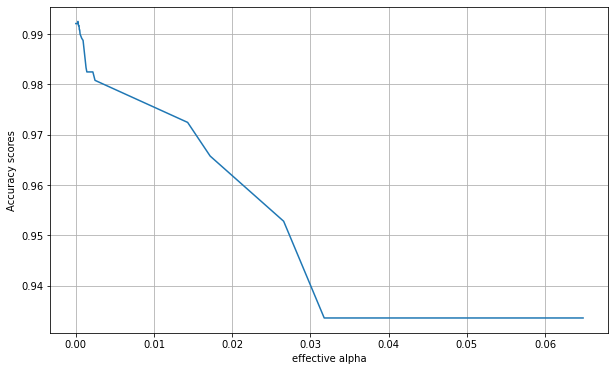

In [ ]:
from sklearn.metrics import accuracy_score

# calculate the accuracy scores of the decision tree models in the clfs array, and add the scores into the acc_scores 
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [ ]:
print({tree_depth: acc_score for tree_depth, acc_score in zip(tree_depths, acc_scores)})

{17: 0.9920668058455114, 16: 0.9920668058455114, 13: 0.9924843423799582, 11: 0.9916492693110647, 10: 0.9887265135699373, 8: 0.9824634655532359, 5: 0.9807933194154489, 4: 0.9724425887265136, 3: 0.9528183716075157, 2: 0.9336116910229645, 0: 0.8041753653444677}


In [ ]:
score = model_tree.score(X_test, y_test)
print(score)

0.992901878914405


In [ ]:
### RandomForest
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)
model_forest.score(X_test, y_test)

0.9891440501043841

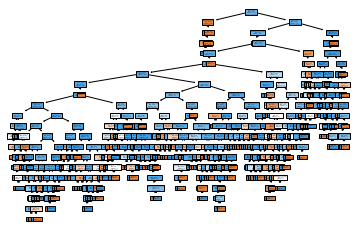

In [ ]:
_ = plot_tree(model_forest.estimators_[0], feature_names=X_test.columns, filled=True)


In [ ]:
Image(filename=plot_my_tree(model_forest.estimators_[0], 'tree_from_forest'))

### Questions
1. How did the DT compare to the RF in performance? Why?
    - *Answer*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *Answer*
3. What is ensemble learning? What are its pros and cons?
    - *Answer*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Answer*

# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [ ]:
# TODO: Implement task 4

In [ ]:
!unzip "/content/drive/MyDrive/ML/svhn.zip" -d '/content'

Archive:  /content/drive/MyDrive/ML/svhn.zip
   creating: /content/svhn/
 extracting: /content/svhn/111.png   
 extracting: /content/svhn/113.png   
 extracting: /content/svhn/114.png   
 extracting: /content/svhn/116.png   
  inflating: /content/svhn/120.png   
 extracting: /content/svhn/124.png   
 extracting: /content/svhn/128.png   
  inflating: /content/svhn/129.png   
  inflating: /content/svhn/130.png   
 extracting: /content/svhn/132.png   
 extracting: /content/svhn/136.png   
 extracting: /content/svhn/138.png   
 extracting: /content/svhn/140.png   
 extracting: /content/svhn/144.png   
 extracting: /content/svhn/148.png   
 extracting: /content/svhn/150.png   
 extracting: /content/svhn/151.png   
 extracting: /content/svhn/153.png   
 extracting: /content/svhn/157.png   
  inflating: /content/svhn/158.png   
 extracting: /content/svhn/159.png   
 extracting: /content/svhn/164.png   
 extracting: /content/svhn/165.png   
 extracting: /content/svhn/166.png   
 extracting: /c

In [ ]:
import torch
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
from torchvision import datasets
from torchvision import transforms

train_dir = "task_4"
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_data_task_4 = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, color_mode= 'grayscale')

test_data_task_4 = datasets.ImageFolder('task_4', transform=transforms.ToTensor())
# generated_image = train_generator[45][0][0]
# plt.imshow(generated_image.squeeze())

cpu


In [ ]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
imgs_path = "task_4/svhn"
file_list = glob.glob(imgs_path + "*")
file_list
data = []
for class_path in file_list:
    class_name = class_path.split("/")[-1]
    for img_path in glob.glob(class_path + "/*.png"):
        data.append([img_path, img_path.split("/")[-1].split('.')[0]])
print(data)

[['task_4/svhn/744.png', '744'], ['task_4/svhn/570.png', '570'], ['task_4/svhn/754.png', '754'], ['task_4/svhn/116.png', '116'], ['task_4/svhn/174.png', '174'], ['task_4/svhn/128.png', '128'], ['task_4/svhn/327.png', '327'], ['task_4/svhn/203.png', '203'], ['task_4/svhn/222.png', '222'], ['task_4/svhn/120.png', '120'], ['task_4/svhn/158.png', '158'], ['task_4/svhn/701.png', '701'], ['task_4/svhn/266.png', '266'], ['task_4/svhn/132.png', '132'], ['task_4/svhn/114.png', '114'], ['task_4/svhn/251.png', '251'], ['task_4/svhn/188.png', '188'], ['task_4/svhn/129.png', '129'], ['task_4/svhn/256.png', '256'], ['task_4/svhn/290.png', '290'], ['task_4/svhn/315.png', '315'], ['task_4/svhn/304.png', '304'], ['task_4/svhn/178.png', '178'], ['task_4/svhn/553.png', '553'], ['task_4/svhn/410.png', '410'], ['task_4/svhn/289.png', '289'], ['task_4/svhn/220.png', '220'], ['task_4/svhn/148.png', '148'], ['task_4/svhn/176.png', '176'], ['task_4/svhn/193.png', '193'], ['task_4/svhn/209.png', '209'], ['task_

In [ ]:
class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "Dog_Cat_Dataset/"
        file_list = glob.glob(self.imgs_path + "*")
        print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpeg"):
                self.data.append([img_path, class_name])
        print(self.data)
        self.class_map = {"dogs" : 0, "cats": 1}
        self.img_dim = (416, 416)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        class_id = torch.tensor([class_id])
        return img_tensor, class_id

### Questions
1. How did your model perform? Why is it better/worse?
    - *Answer*
2. What is domain gap in the context of ML?
    - *Answer*
3. Suggest two ways through which the problem of domain gap can be tackled.
    - *Answer*